# Série temporal com Facebook Prophet - previsão de visualizações diárias de páginas web

## Instalação da biblioteca e importação da base de dados

- Visualizações diárias de uma página web da Wikipedia: https://en.wikipedia.org/wiki/Peyton_Manning

In [ ]:
!pip install fbprophet

Instalação da ferramenta
Prophet é a classe que vamos utilizar para realizar essa série temporal. Funciona bem para base de dados grandes.

In [ ]:
from fbprophet import Prophet
import pandas as pd

Datas e visualizações

In [ ]:
dataset = pd.read_csv('/content/page_wikipedia.csv')
dataset

,date,views
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
...,...,...
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871


Total de visualizações, média, desvio-padrão, 1° quartil, mediana, 2° e 3° quartil.

In [ ]:
dataset.describe()

,views
count,2905.000000
mean,8.138958
std,0.845957
min,5.262690
25%,7.514800
50%,7.997999
75%,8.580168
max,12.846747


Histograma

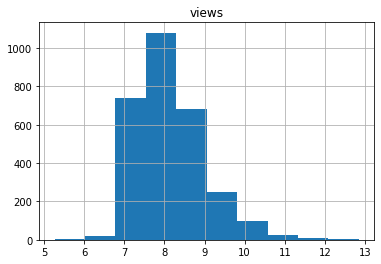

In [ ]:
dataset.hist();

Renomear as colunas (regra da ferramenta), transforma views em y, date para ds. Também é necessário ordenar os dados

In [ ]:
dataset = dataset[['date', 'views']].rename(columns = {'date': 'ds', 'views': 'y'})
dataset

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
...,...,...
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871


Ordenando os dados

In [ ]:
dataset = dataset.sort_values(by = 'ds')
dataset

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
...,...,...
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871


## Construção do modelo e previsões

Construindo o modelo:

In [ ]:
model = Prophet()
model.fit(dataset)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Construindo a previsão (número de períodos, nesse ex: 90 dias)

In [ ]:
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

Previsão dos cinco primeiros registros

In [ ]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-12-10,8.038509,8.241790,9.459794,8.038509,8.038509,0.803012,0.803012,0.803012,0.352283,0.352283,0.352283,0.450729,0.450729,0.450729,0.0,0.0,0.0,8.841521
1,2007-12-11,8.036976,7.953564,9.223507,8.036976,8.036976,0.553114,0.553114,0.553114,0.119631,0.119631,0.119631,0.433483,0.433483,0.433483,0.0,0.0,0.0,8.590090
2,2007-12-12,8.035443,7.766681,8.963658,8.035443,8.035443,0.350515,0.350515,0.350515,-0.066656,-0.066656,-0.066656,0.417171,0.417171,0.417171,0.0,0.0,0.0,8.385958
3,2007-12-13,8.033910,7.803134,8.987128,8.033910,8.033910,0.329968,0.329968,0.329968,-0.072272,-0.072272,-0.072272,0.402239,0.402239,0.402239,0.0,0.0,0.0,8.363878
4,2007-12-14,8.032377,7.746967,8.974837,8.032377,8.032377,0.319515,0.319515,0.319515,-0.069577,-0.069577,-0.069577,0.389092,0.389092,0.389092,0.0,0.0,0.0,8.351892


Tamanho da base original e base utilizada para as previsões

In [ ]:
len(dataset), len(forecast)

(2905, 2995)

In [ ]:
len(forecast) - len(dataset)

90

yhat: valores das previsões

In [ ]:
forecast.tail(90)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2905,2016-01-21,7.561398,7.962315,9.196882,7.561398,7.561398,0.999876,0.999876,0.999876,-0.072272,-0.072272,-0.072272,1.072148,1.072148,1.072148,0.0,0.0,0.0,8.561274
2906,2016-01-22,7.560382,7.934445,9.198706,7.560382,7.560382,1.016899,1.016899,1.016899,-0.069577,-0.069577,-0.069577,1.086476,1.086476,1.086476,0.0,0.0,0.0,8.577281
2907,2016-01-23,7.559367,7.691772,8.927698,7.559367,7.559367,0.786633,0.786633,0.786633,-0.311714,-0.311714,-0.311714,1.098347,1.098347,1.098347,0.0,0.0,0.0,8.345999
2908,2016-01-24,7.558351,8.123094,9.359255,7.558351,7.558351,1.155671,1.155671,1.155671,0.048306,0.048306,0.048306,1.107365,1.107365,1.107365,0.0,0.0,0.0,8.714022
2909,2016-01-25,7.557335,8.383403,9.603628,7.557335,7.557335,1.465402,1.465402,1.465402,0.352283,0.352283,0.352283,1.113119,1.113119,1.113119,0.0,0.0,0.0,9.022737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2990,2016-04-15,7.475050,6.304706,7.540255,7.456436,7.503304,-0.560920,-0.560920,-0.560920,-0.069577,-0.069577,-0.069577,-0.491343,-0.491343,-0.491343,0.0,0.0,0.0,6.914130
2991,2016-04-16,7.474034,6.088863,7.331629,7.455070,7.503072,-0.772962,-0.772962,-0.772962,-0.311714,-0.311714,-0.311714,-0.461248,-0.461248,-0.461248,0.0,0.0,0.0,6.701071
2992,2016-04-17,7.473018,6.484576,7.660724,7.453451,7.502778,-0.383246,-0.383246,-0.383246,0.048306,0.048306,0.048306,-0.431552,-0.431552,-0.431552,0.0,0.0,0.0,7.089771
2993,2016-04-18,7.472002,6.797278,8.080250,7.451854,7.502296,-0.050713,-0.050713,-0.050713,0.352283,0.352283,0.352283,-0.402996,-0.402996,-0.402996,0.0,0.0,0.0,7.421289


## Gráfico das previsões

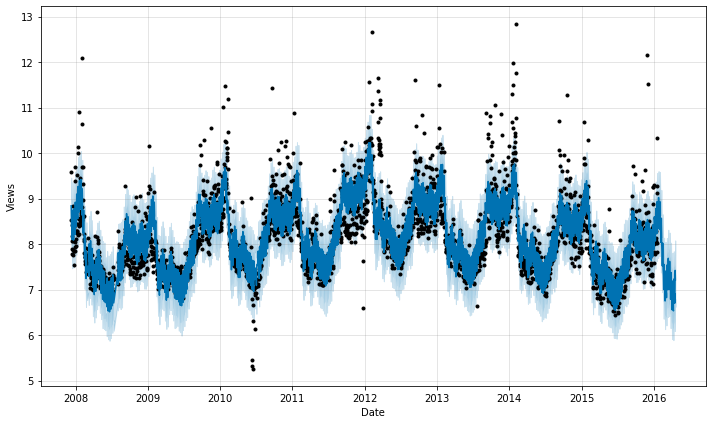

In [ ]:
model.plot(forecast, xlabel = 'Date', ylabel = 'Views');

Análise da série temporal: tendência - diariamente, semanal, anual

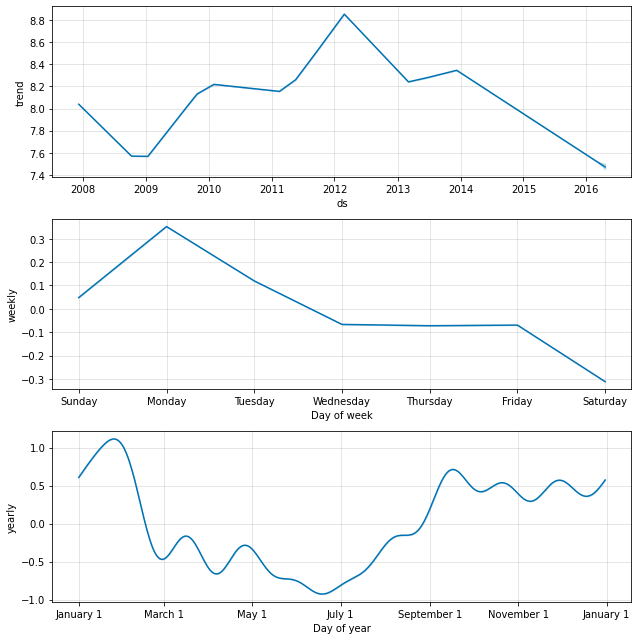

In [ ]:
model.plot_components(forecast);

In [ ]:
from fbprophet.plot import plot_plotly, plot_components_plotly

Gráfico interativo: Modelo x previsões (é possível fazer filtros, selecionar, aumentar e diminuir o zoom)

In [ ]:
plot_plotly(model, forecast)

Outro modelo de gráfico interativo

In [ ]:
plot_components_plotly(model, forecast)